In [2]:
from model.decoder import MultiModalRegressionTransformer

model = MultiModalRegressionTransformer(384, 26, 64, 28, 6, 16, 5, 0)






In [3]:
import torch
import torch.nn as nn
model_path = 'val_loss0.1074_DPR_0.1_MP_0.3_DM_64_TL_5_heads_16.pth'

model.load_state_dict(torch.load(model_path, map_location='cpu'))
model.eval()


MultiModalRegressionTransformer(
  (embeddings_module): MultiModalInputEmbeddings(
    (smiles_proj): FeedForwardNeuralNetwork(
      (fc1): Linear(in_features=384, out_features=1536, bias=True)
      (relu): ReLU()
      (fc2): Linear(in_features=1536, out_features=64, bias=True)
    )
    (property_embedding): Embedding(26, 64)
    (value_proj): Linear(in_features=1, out_features=64, bias=True)
    (token_type_embeddings): Embedding(6, 64)
    (position_encodings): PositionalEncoding(
      (dropout): Dropout(p=0, inplace=False)
    )
    (LayerNorm): LayerNorm((64,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (transformer_decoder_layers): ModuleList(
    (0-4): 5 x MaskedMultiHeadSelfAttentionBlock(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
      )
      (linear1): Linear(in_features=64, out_features=256, bias=True)
      (dropout_ffn): Dropout(p=0, 

In [5]:
for name, module in model.named_modules():
    if isinstance(module, nn.Embedding):
        print(f"Found Embedding Layer: {name}")
        

Found Embedding Layer: embeddings_module.property_embedding
Found Embedding Layer: embeddings_module.token_type_embeddings


In [4]:

embedding_layer = model.embeddings_module.property_embedding

# Get the weights (embeddings)
# .weight returns a torch.nn.Parameter, so we typically convert it to a tensor
embeddings = embedding_layer.weight.data
transposed_data = embeddings.T  # Transpose the embeddings tensor 



print(f"Shape of embeddings: {embeddings.shape}")
print(f"First 5 embedding vectors:\n {embeddings[:5]}")

Shape of embeddings: torch.Size([26, 64])
First 5 embedding vectors:
 tensor([[ 6.7689e-01, -4.2498e-03,  2.8816e-01,  9.1929e-01, -6.4668e-01,
          5.4277e-01, -5.2412e-01, -9.3562e-01, -2.1526e-01, -1.5544e-01,
         -4.9813e-02, -8.1560e-03,  2.4427e-01, -8.9465e-02,  4.1186e-02,
         -2.0191e-01,  5.0104e-03, -1.4162e-01,  6.6826e-01, -1.2418e-01,
          1.3581e-01,  4.6446e-01,  3.7882e-01, -8.5767e-01,  1.7623e-01,
          4.3280e-01, -7.0159e-02, -2.8782e-01, -2.8000e-01, -8.4746e-02,
         -1.6860e-01, -3.4444e-01, -3.0750e-01, -7.5160e-02,  2.1594e-01,
         -4.4065e-01,  4.5459e-01, -2.5883e-01,  2.9049e-01, -4.7633e-01,
         -2.5992e-01, -1.5758e-01,  2.8079e-01,  2.5400e-01, -2.1984e-01,
         -2.7396e-01,  4.4217e-01, -4.2909e-01, -4.7235e-01,  2.3998e-01,
         -4.3833e-02, -8.2132e-02, -2.8617e-01,  4.5009e-01,  6.0627e-01,
         -6.6629e-01,  3.8043e-01, -4.1248e-03,  7.0795e-01, -6.3164e-01,
          7.9865e-01, -8.3509e-01,  1.2055

In [6]:
import pandas as pd
WORD_TOKENS = ['alkane', 'aromatic', 'halohydrocarbon', 'ether', 'ketone', 'ester', 'nitrile', 'amine', 'amide', 'misc_N_compound', 'carboxylic_acid', 'monohydric_alcohol' , 'polyhydric_alcohol', 'other','ET30', 'alpha', 'beta', 'pi_star', 'SA', 'SB', 'SP', 'SdP', 'N_mol_cm3', 'n', 'fn', 'delta']


# Convert to NumPy array
transposed = embeddings.T
numpy_array = embeddings.numpy()

# Create DataFrame
# The columns will be indexed 0, 1, 2...
df = pd.DataFrame(transposed)
print(df.shape)

df.columns = WORD_TOKENS


(64, 26)


C:\Users\gkg124\AppData\Local\Temp\ipykernel_12212\4139414245.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis')
C:\Users\gkg124\AppData\Local\Temp\ipykernel_12212\4139414245.py:49: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, alpha=0.3)


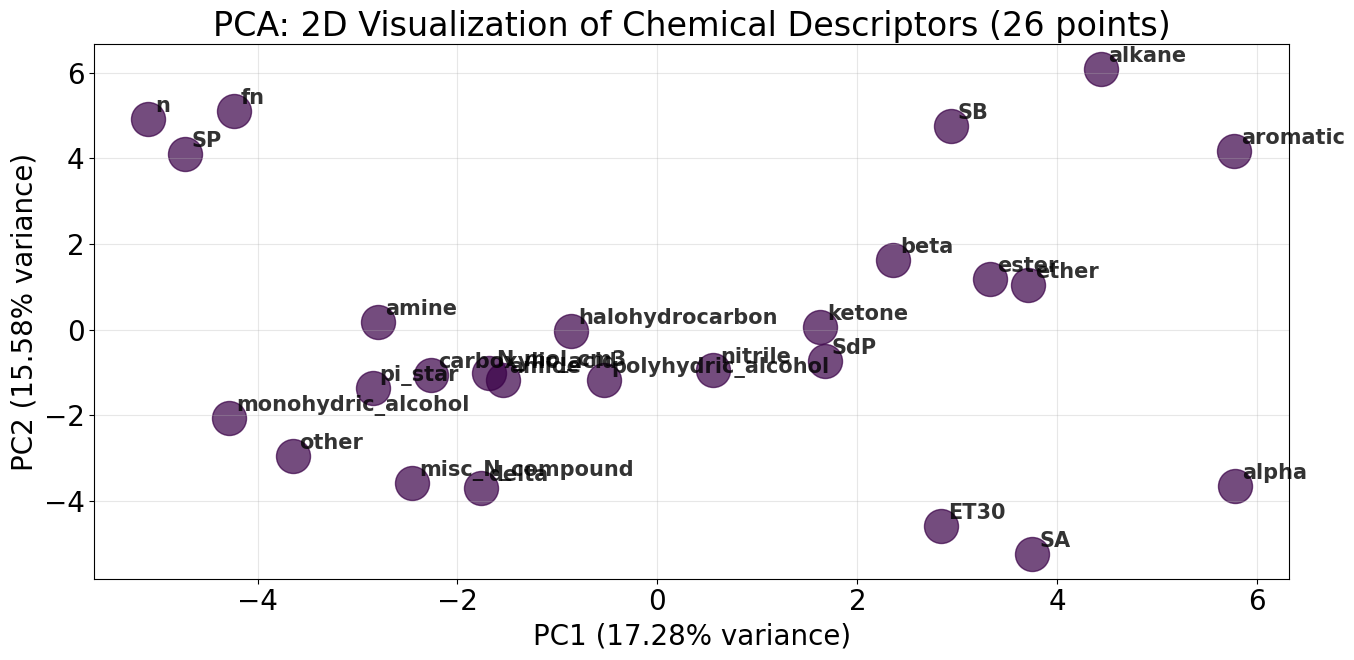

Explained variance ratio: [0.17281292 0.15575665]
Total variance explained: 32.86%


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm


def pca_scatter_plot(df, n_components=2):
    """
    Reduce each column (384 dimensions) to n_components using PCA and create scatter plot.
    
    Args:
        df: DataFrame with shape (384, 26) - each column will be reduced to 2D
        n_components: Number of PCA components (default=2)
    """
    # Transpose so each row represents a column (26 rows, 384 features each)
    df_transposed = df.T
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Latin Modern Sans', 'DejaVu Sans', 'Arial']    
    plt.rcParams['font.size'] = 20
    viridis = cm.get_cmap('viridis')
    dark_purple_d = viridis(0)  # A color from the start of the map

    dark_purple = viridis(0.4)  # A color from the start of the map
    mid_green = viridis(0.6)    # A color from the middle
    bright_yellow = viridis(0.9)
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_transposed)
    
    # Apply PCA to reduce from 384 dimensions to 2
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    
    # Create scatter plot
    plt.figure(figsize=(14, 7))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], color="#390047", alpha=0.7, s=600)
    
    # Add labels for each point (using column names)
    for i, col_name in enumerate(df.columns):
        plt.annotate(col_name, (pca_result[i, 0], pca_result[i, 1]), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=15, fontweight='bold', alpha=0.8)
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.title('PCA: 2D Visualization of Chemical Descriptors (26 points)')
    plt.grid(False, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")
    
    return pca_result, pca
    

# Apply to your DataFrame
pca_result, pca_model = pca_scatter_plot(df)

C:\Users\gkg124\AppData\Local\Temp\ipykernel_12212\1867718421.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis')
C:\Users\gkg124\AppData\Local\Temp\ipykernel_12212\1867718421.py:53: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, alpha=0.3)


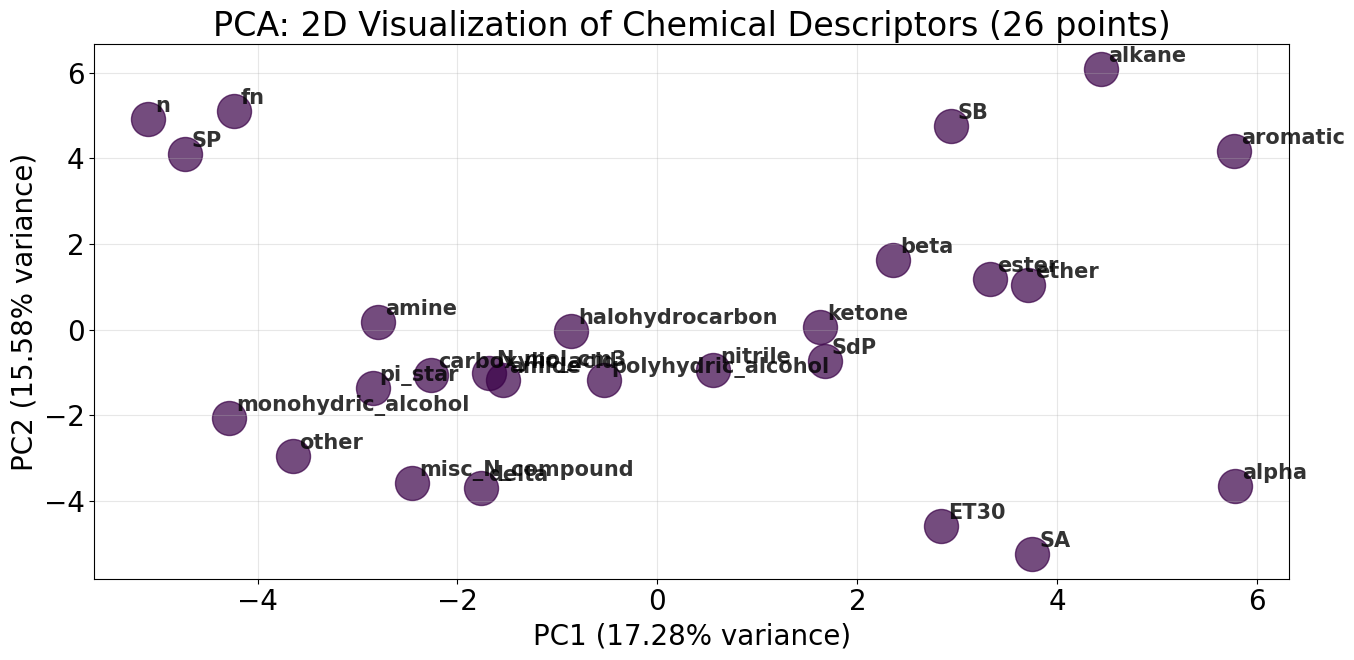

Explained variance ratio: [0.17281292 0.15575665]
Total variance explained: 32.86%


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import re # Import the regular expressions module

def pca_scatter_plot(df, n_components=2):
    """
    Reduce each column (384 dimensions) to n_components using PCA and create scatter plot.
    
    Args:
        df: DataFrame with shape (384, 26) - each column will be reduced to 2D
        n_components: Number of PCA components (default=2)
    """
    # Transpose so each row represents a column (26 rows, 384 features each)
    df_transposed = df.T
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Latin Modern Sans', 'DejaVu Sans', 'Arial']    
    plt.rcParams['font.size'] = 20
    viridis = cm.get_cmap('viridis')
    dark_purple_d = viridis(0)  # A color from the start of the map

    dark_purple = viridis(0.4)  # A color from the start of the map
    mid_green = viridis(0.6)    # A color from the middle
    bright_yellow = viridis(0.9)
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_transposed)
    
    # Apply PCA to reduce from 384 dimensions to 2
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    
    # Create scatter plot
    plt.figure(figsize=(14, 7))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], color="#390047", alpha=0.7, s=600)
    
    # Add labels for each point (using column names)
    for i, col_name in enumerate(df.columns):
        plt.annotate(col_name, (pca_result[i, 0], pca_result[i, 1]), 
                     xytext=(5, 5), textcoords='offset points', 
                     fontsize=15, fontweight='bold', alpha=0.8)
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    
    # Define the plot title and get the title text
    plot_title = 'PCA: 2D Visualization of Chemical Descriptors (26 points)'
    plt.title(plot_title)
    
    plt.grid(False, alpha=0.3)
    plt.tight_layout()
    
    # Sanitize the title to create a valid filename
    # Replace any character that is not a letter, number, or space with an underscore
    safe_title = re.sub(r'[^\w\s]', '_', plot_title) 
    # Replace spaces with underscores
    safe_title = safe_title.replace(' ', '_')
    
    # Save the plot with the sanitized title as the filename
    plt.savefig(f'{safe_title}.png', bbox_inches='tight')
    
    # Optional: Keep plt.show() to display the plot as well
    plt.show() 
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")
    
    return pca_result, pca

# Apply to your DataFrame
pca_result, pca_model = pca_scatter_plot(df) # Uncomment this when you have your 'df'

C:\Users\gkg124\AppData\Local\Temp\ipykernel_26072\2179547130.py:96: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.3)


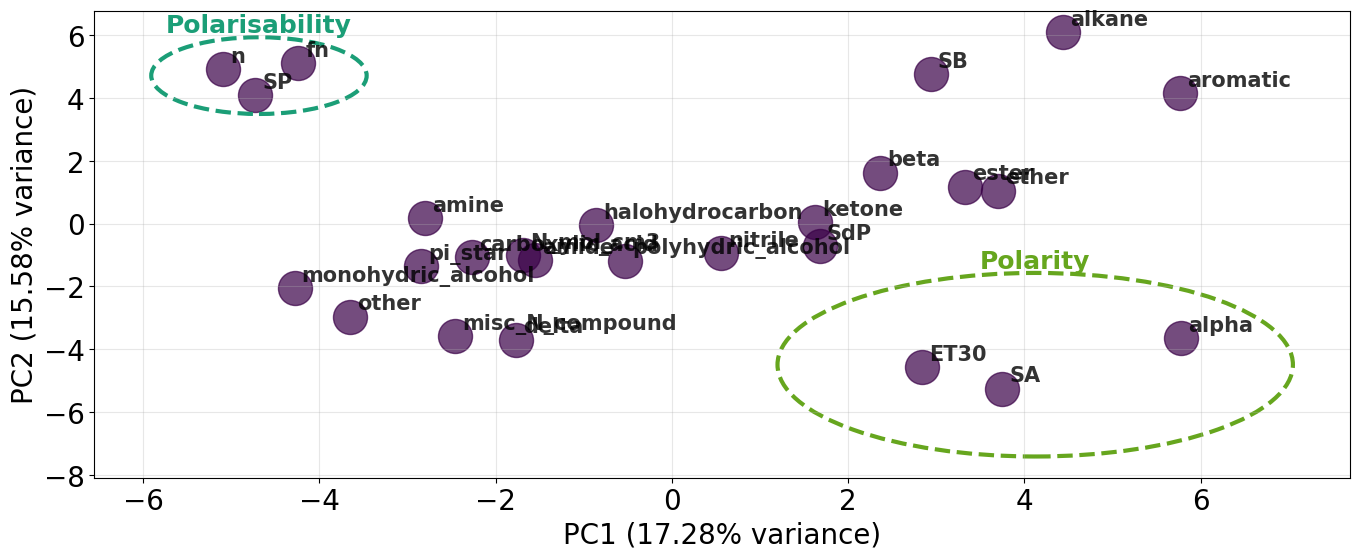

Explained variance ratio: [0.17281292 0.15575665]
Total variance explained: 32.86%


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import re # Import the regular expressions module

def pca_scatter_plot(df, n_components=2, highlight_groups=None, group_labels=None):
    """
    Reduce each column (384 dimensions) to n_components using PCA and create scatter plot.
    
    Args:
        df: DataFrame with shape (384, 26) - each column will be reduced to 2D
        n_components: Number of PCA components (default=2)
        highlight_groups: list of lists of column names, each group will be circled in a different color
        group_labels: list of names (strings), one per group, used to label each circle
    """
    # Transpose so each row represents a column (26 rows, 384 features each)
    df_transposed = df.T
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Latin Modern Sans', 'DejaVu Sans', 'Arial']    
    plt.rcParams['font.size'] = 20

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_transposed)
    
    # Apply PCA to reduce from 384 dimensions to 2
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    
    # Create scatter plot
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.scatter(pca_result[:, 0], pca_result[:, 1], color="#390047", alpha=0.7, s=600)
    
    # Add labels for each point (using column names)
    for i, col_name in enumerate(df.columns):
        ax.annotate(col_name, (pca_result[i, 0], pca_result[i, 1]), 
                     xytext=(5, 5), textcoords='offset points', 
                     fontsize=15, fontweight='bold', alpha=0.8)
    
    # Highlight groups of points with enclosing circles
    if highlight_groups:
        # Use colormap
        colormap = plt.cm.Dark2
        
        # Create a range of values from 0 to 1, one for each group
        num_groups = len(highlight_groups)
        color_values = np.linspace(0, 1, num_groups)

        for g_idx, group in enumerate(highlight_groups):
            coords = []
            for label in group:
                if label in df.columns:
                    idx = list(df.columns).index(label)
                    x, y = pca_result[idx, 0], pca_result[idx, 1]
                    coords.append((x, y))
            if coords:
                coords = np.array(coords)
                centroid = coords.mean(axis=0)
                max_dist = np.sqrt(((coords - centroid) ** 2).sum(axis=1)).mean()
                radius = max_dist * 2.2
                
                # Use the colormap function to get the color for the current group
                color = colormap(color_values[g_idx] * 0.6)
                
                circle = plt.Circle(
                    centroid, radius,
                    color=color,
                    fill=False, linewidth=3, linestyle='--'
                )
                ax.add_patch(circle)

                # Add a label for the circle (use group_labels if provided, else default)
                if group_labels and g_idx < len(group_labels):
                    circle_label = group_labels[g_idx]
                else:
                    circle_label = f"Group {g_idx+1}"

                # New code to position the label at the top of the circle
                label_x = centroid[0]
                label_y = centroid[1] + radius
                
                ax.annotate(
                    circle_label,
                    xy=(label_x, label_y),
                    ha='center', va='bottom',  # Align the text's bottom to the xy point
                    fontsize=18, fontweight='bold',
                    color=color
                )
    
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    
    ax.grid(False, alpha=0.3)
    plt.tight_layout()
    name = 'word_token_embeddings'
    plt.savefig(f'{name}.pdf', bbox_inches='tight')
    plt.show() 
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")
    
    return pca_result, pca


# Example usage:
highlight_labels = [['n', 'fn', 'SP'], ['ET30', 'SA', 'alpha']]
circle_names = ['Polarisability', 'Polarity']  # <-- names for each circle
pca_result, pca_model = pca_scatter_plot(df, n_components=2, highlight_groups=highlight_labels, group_labels=circle_names)


C:\Users\gkg124\AppData\Local\Temp\ipykernel_20864\2898994469.py:90: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.3)


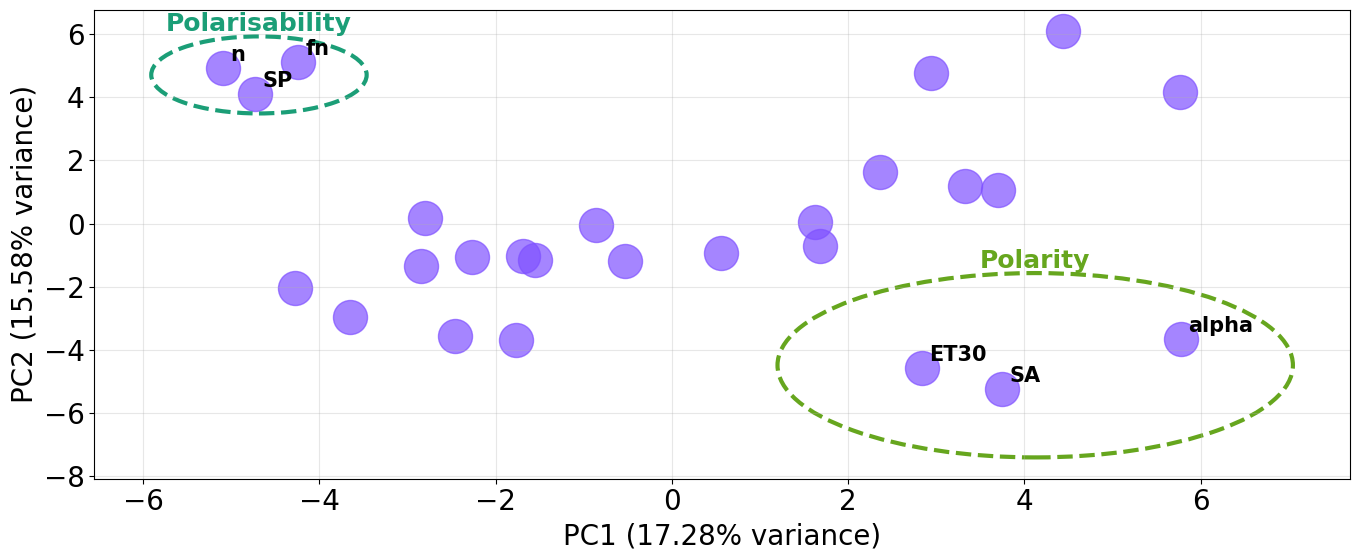

Explained variance ratio: [0.17281292 0.15575665]
Total variance explained: 32.86%


In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import re 

def pca_scatter_plot(df, n_components=2, highlight_groups=None, group_labels=None):
    """
    Reduce each column (384 dimensions) to n_components using PCA and create scatter plot.
    
    Args:
        df: DataFrame with shape (384, 26) - each column will be reduced to 2D
        n_components: Number of PCA components (default=2)
        highlight_groups: list of lists of column names, each group will be circled in a different color
        group_labels: list of names (strings), one per group, used to label each circle
    """
    # Transpose so each row represents a column (26 rows, 384 features each)
    df_transposed = df.T
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Latin Modern Sans', 'DejaVu Sans', 'Arial']    
    plt.rcParams['font.size'] = 20

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_transposed)
    
    # Apply PCA to reduce from 384 dimensions to 2
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    
    # Create scatter plot
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.scatter(pca_result[:, 0], pca_result[:, 1], color="#7F51FF", alpha=0.7, s=600)
    
    # Highlight groups of points with enclosing circles + labels for only these points
    if highlight_groups:
        colormap = plt.cm.Dark2
        num_groups = len(highlight_groups)
        color_values = np.linspace(0, 1, num_groups)

        for g_idx, group in enumerate(highlight_groups):
            coords = []
            for label in group:
                if label in df.columns:
                    idx = list(df.columns).index(label)
                    x, y = pca_result[idx, 0], pca_result[idx, 1]
                    coords.append((x, y))
                    
                    # ✅ Only label highlighted points
                    ax.annotate(label, (x, y),
                                xytext=(5, 5), textcoords='offset points',
                                fontsize=15, fontweight='bold', alpha=1)
                    
            if coords:
                coords = np.array(coords)
                centroid = coords.mean(axis=0)
                max_dist = np.sqrt(((coords - centroid) ** 2).sum(axis=1)).mean()
                radius = max_dist * 2.2

                color = colormap(color_values[g_idx] * 0.6)
                circle = plt.Circle(
                    centroid, radius,
                    color=color,
                    fill=False, linewidth=3, linestyle='--'
                )
                ax.add_patch(circle)

                # Circle group label
                if group_labels and g_idx < len(group_labels):
                    circle_label = group_labels[g_idx]
                else:
                    circle_label = f"Group {g_idx+1}"

                label_x = centroid[0]
                label_y = centroid[1] + radius
                
                ax.annotate(
                    circle_label,
                    xy=(label_x, label_y),
                    ha='center', va='bottom',
                    fontsize=18, fontweight='bold',
                    color=color
                )
    
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    
    ax.grid(False, alpha=0.3)
    plt.tight_layout()
    name = 'word_token_embeddings'
    plt.savefig(f'{name}.pdf', bbox_inches='tight')
    plt.show() 
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")
    
    return pca_result, pca

highlight_labels = [['n', 'fn', 'SP'], ['ET30', 'SA', 'alpha']]
circle_names = ['Polarisability', 'Polarity']  # <-- names for each circle
pca_result, pca_model = pca_scatter_plot(df, n_components=2, highlight_groups=highlight_labels, group_labels=circle_names)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def analyze_descriptor_distances(df):
    """
    Analyze distances/similarities between chemical descriptors using various metrics.
    
    Args:
        df: DataFrame with shape (384, 26)
    """
    # Transpose so each row is a descriptor
    df_transposed = df.T
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_transposed)
    
    # 1. Euclidean Distance Matrix
    euclidean_dist = euclidean_distances(scaled_data)
    euclidean_df = pd.DataFrame(euclidean_dist, 
                               index=df.columns, 
                               columns=df.columns)
    
    # 2. Cosine Similarity (then convert to distance)
    cosine_sim = cosine_similarity(scaled_data)
    cosine_dist = 1 - cosine_sim  # Convert similarity to distance
    cosine_df = pd.DataFrame(cosine_dist,
                            index=df.columns,
                            columns=df.columns)
    
    # 3. Manhattan Distance
    manhattan_dist = manhattan_distances(scaled_data)
    manhattan_df = pd.DataFrame(manhattan_dist,
                               index=df.columns,
                               columns=df.columns)
    
    # 4. Correlation Distance
    corr_matrix = df.corr()
    corr_dist = 1 - abs(corr_matrix)  # Distance = 1 - |correlation|
    
    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    
    # Euclidean Distance Heatmap
    sns.heatmap(euclidean_df, annot=False, cmap='viridis', ax=axes[0,0])
    axes[0,0].set_title('Euclidean Distance Matrix')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].tick_params(axis='y', rotation=0)
    
    # Cosine Distance Heatmap
    sns.heatmap(cosine_df, annot=False, cmap='plasma', ax=axes[0,1])
    axes[0,1].set_title('Cosine Distance Matrix')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].tick_params(axis='y', rotation=0)
    
    # Manhattan Distance Heatmap
    sns.heatmap(manhattan_df, annot=False, cmap='inferno', ax=axes[1,0])
    axes[1,0].set_title('Manhattan Distance Matrix')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].tick_params(axis='y', rotation=0)
    
    # Correlation Distance Heatmap
    sns.heatmap(corr_dist, annot=False, cmap='coolwarm', ax=axes[1,1])
    axes[1,1].set_title('Correlation Distance Matrix')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].tick_params(axis='y', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'euclidean': euclidean_df,
        'cosine': cosine_df, 
        'manhattan': manhattan_df,
        'correlation': corr_dist
    }

def hierarchical_clustering(df, method='euclidean'):
    """
    Perform hierarchical clustering and show dendrogram.
    
    Args:
        df: DataFrame with shape (384, 26)
        method: Distance metric ('euclidean', 'cosine', 'correlation', etc.)
    """
    df_transposed = df.T
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_transposed)
    
    # Compute distance matrix
    if method == 'cosine':
        # For cosine, use 1 - cosine_similarity
        cos_sim = cosine_similarity(scaled_data)
        distances = 1 - cos_sim
        condensed_dist = squareform(distances, checks=False)
    else:
        condensed_dist = pdist(scaled_data, metric=method)
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(condensed_dist, method='ward')
    
    # Create dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=df.columns, orientation='top')
    plt.title(f'Hierarchical Clustering Dendrogram ({method} distance)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return linkage_matrix

def find_closest_pairs(distance_df, n_pairs=5):
    """Find the n closest pairs of descriptors."""
    # Set diagonal to infinity to ignore self-comparisons
    dist_copy = distance_df.copy()
    np.fill_diagonal(dist_copy.values, np.inf)
    
    # Find closest pairs
    closest_pairs = []
    for i in range(len(dist_copy)):
        for j in range(i+1, len(dist_copy)):
            distance = dist_copy.iloc[i, j]
            closest_pairs.append((distance, dist_copy.index[i], dist_copy.columns[j]))
    
    # Sort by distance and return top n
    closest_pairs.sort(key=lambda x: x[0])
    
    print(f"Top {n_pairs} closest descriptor pairs:")
    for i, (dist, desc1, desc2) in enumerate(closest_pairs[:n_pairs]):
        print(f"{i+1}. {desc1} ↔ {desc2}: {dist:.3f}")
    
    return closest_pairs[:n_pairs]

# Example usage:
# distances = analyze_descriptor_distances(df)
# clustering = hierarchical_clustering(df, method='euclidean')
# closest = find_closest_pairs(distances['euclidean'])

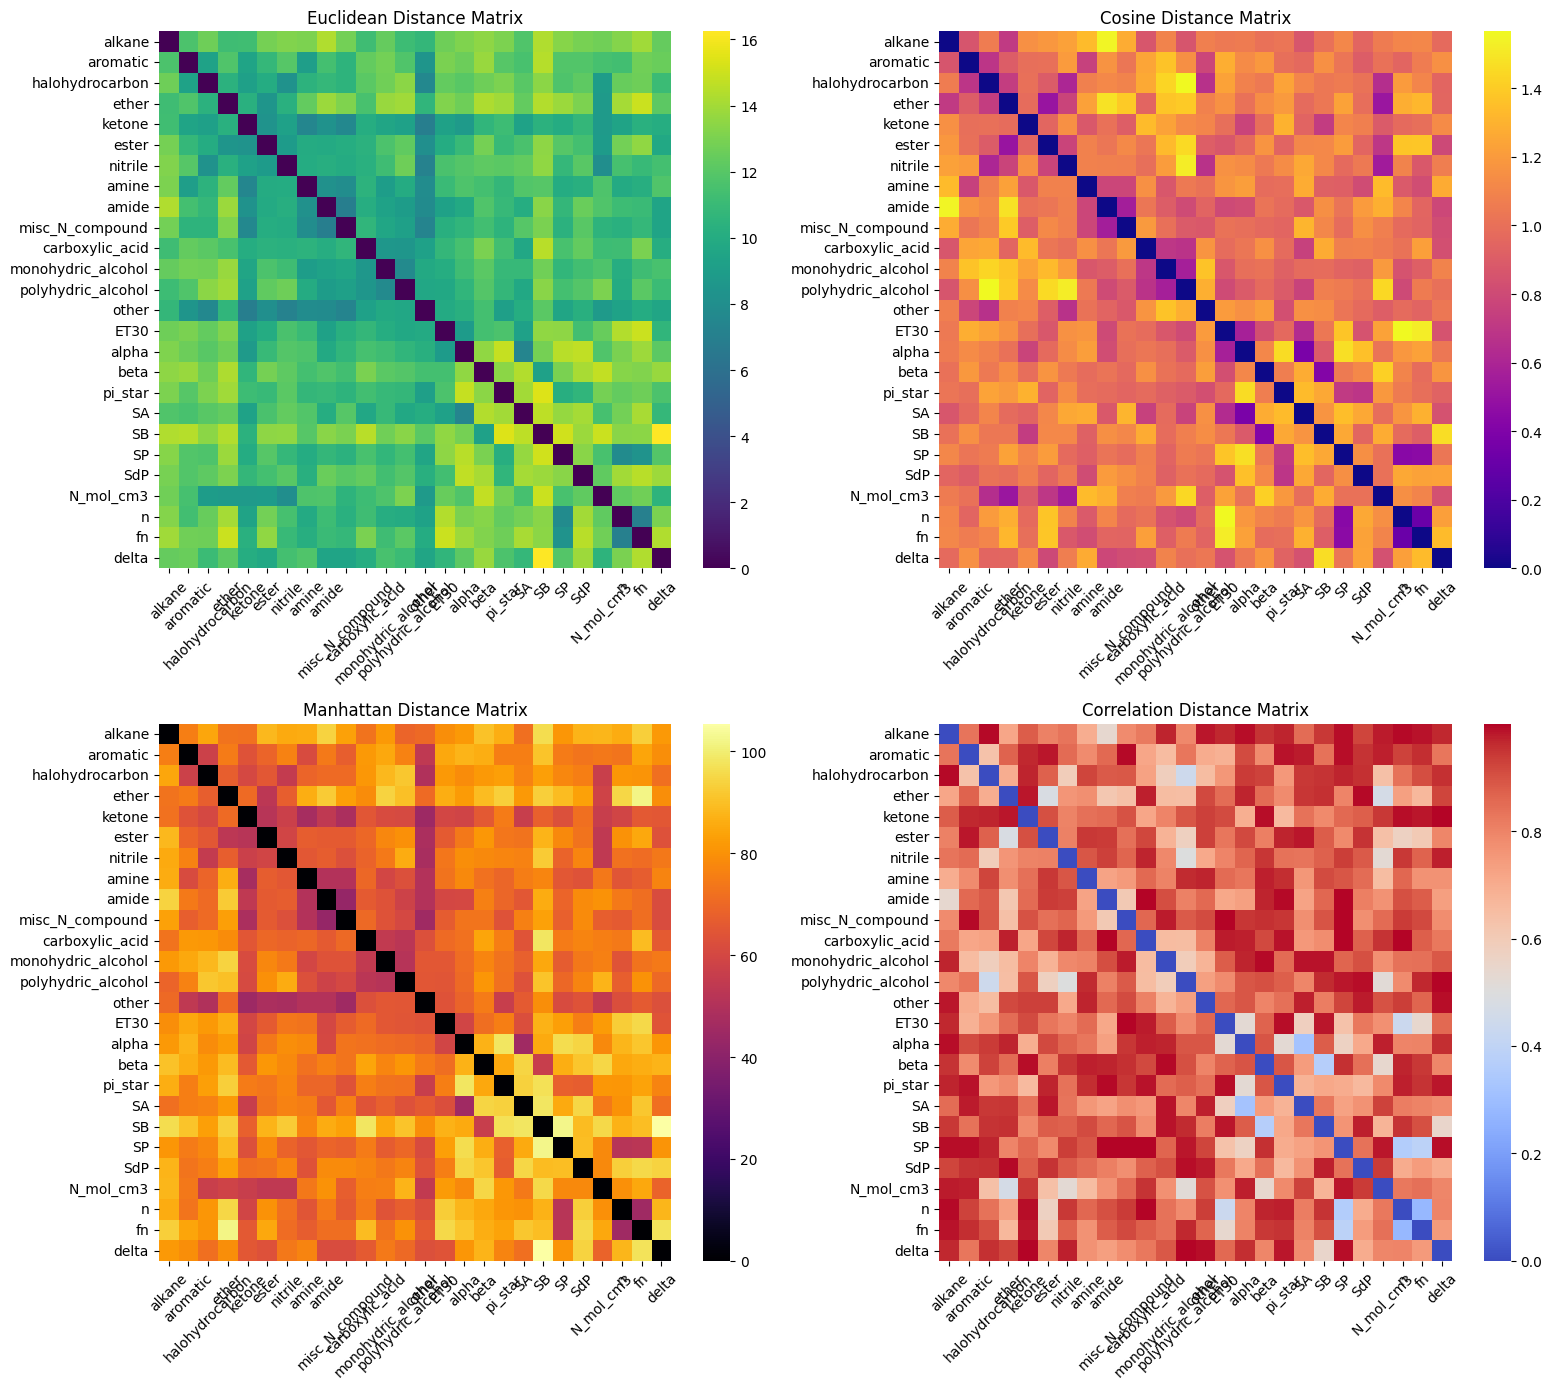

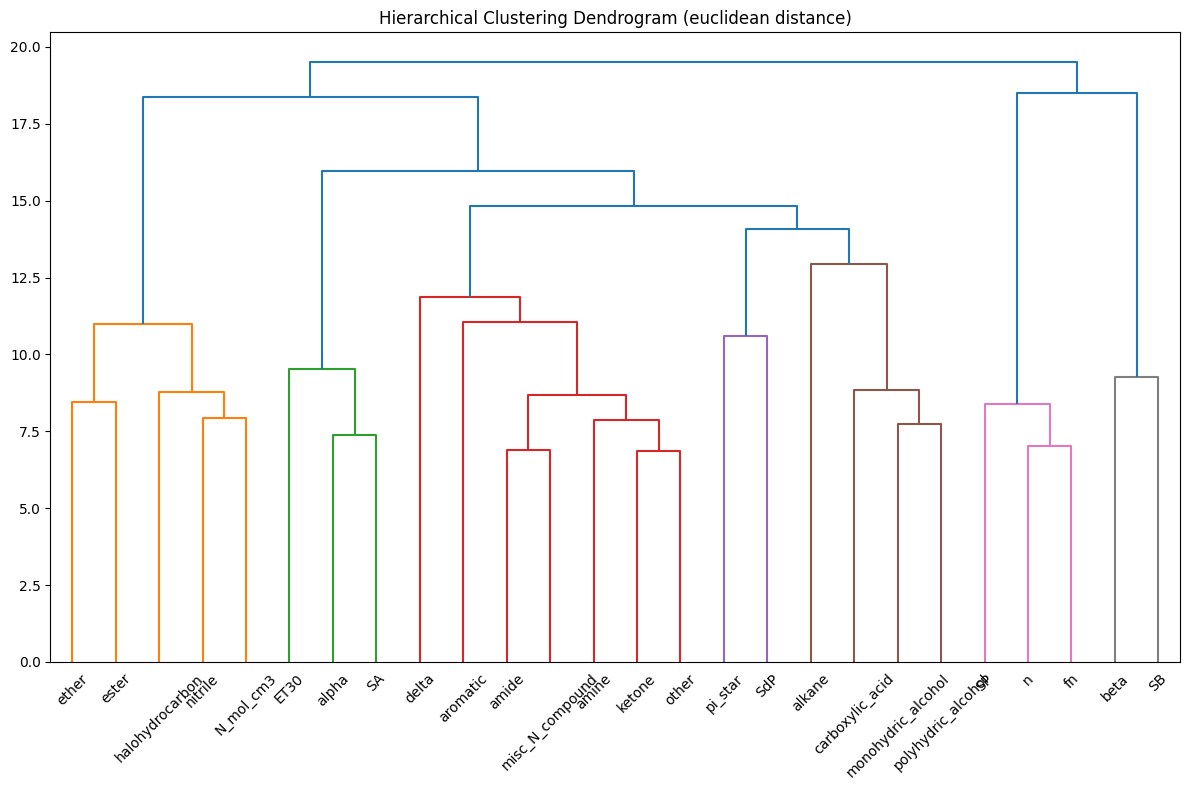

Top 5 closest descriptor pairs:
1. ketone ↔ other: 6.874
2. amide ↔ misc_N_compound: 6.886
3. n ↔ fn: 7.007
4. nitrile ↔ other: 7.129
5. misc_N_compound ↔ other: 7.323


In [8]:
distances = analyze_descriptor_distances(df)
clustering = hierarchical_clustering(df, method='euclidean')
closest = find_closest_pairs(distances['euclidean'])

In [ ]:
#numpy_array = transposed_data.numpy()
# Create DataFrame with appropriate column names
df_vocab = pd.DataFrame(transposed_data)
print(df_vocab.shape)
df_vocab.columns = WORD_TOKENS
print(df_vocab.columns)  # Display the column names
  # Select the last 12 columns for PCA

(2, 12)


ValueError: Length mismatch: Expected axis has 12 elements, new values have 26 elements

In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [20]:
data_for_pca = df.tail(12)
print(f"Shape of data for PCA: {data_for_pca.shape}")

# Convert the selected data to a NumPy array for PCA
X = data_for_pca.values

Shape of data for PCA: (12, 384)


In [21]:
pca = PCA(n_components=2)

# Fit PCA to the data and transform it
# The fit_transform method fits PCA to X and then applies the dimensionality reduction
X_reduced = pca.fit_transform(X)

print(f"Shape of PCA reduced data: {X_reduced.shape}")
print(f"Explained variance ratio of principal components: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.2f}")

Shape of PCA reduced data: (12, 2)
Explained variance ratio of principal components: [0.14462486 0.11333592]
Total explained variance: 0.26


float32


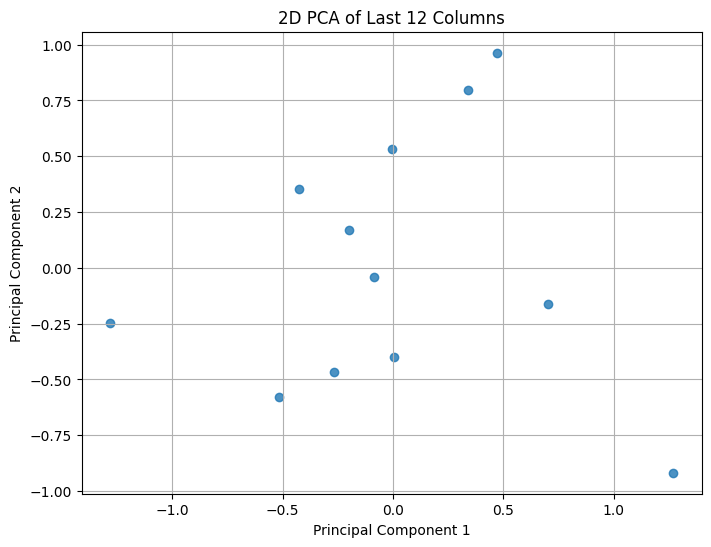

In [22]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.8)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Last 12 Columns')
plt.grid(True)
plt.show()

In [25]:
transposed_data = X_reduced.T
print(f"Shape after transposing: {transposed_data.shape}") # (2, 12)

# Create a DataFrame from the transposed data
# Now, the 12 columns will correspond to the original 12 data points (rows)
# and the 2 rows will correspond to the 2 principal components.
df_12_cols = pd.DataFrame(transposed_data)
print(df_12_cols.shape)

Shape after transposing: (2, 12)
(2, 12)


In [ ]:
WORD_TOKENS[-12:]

df_12_cols.columns = WORD_TOKENS[-12:] 
print(df_12_cols.columns) # Assign the last 12 tokens as column names

Index(['ET30', 'alpha', 'beta', 'pi_star', 'SA', 'SB', 'SP', 'SdP',
       'N_mol_cm3', 'n', 'fn', 'delta'],
      dtype='object')


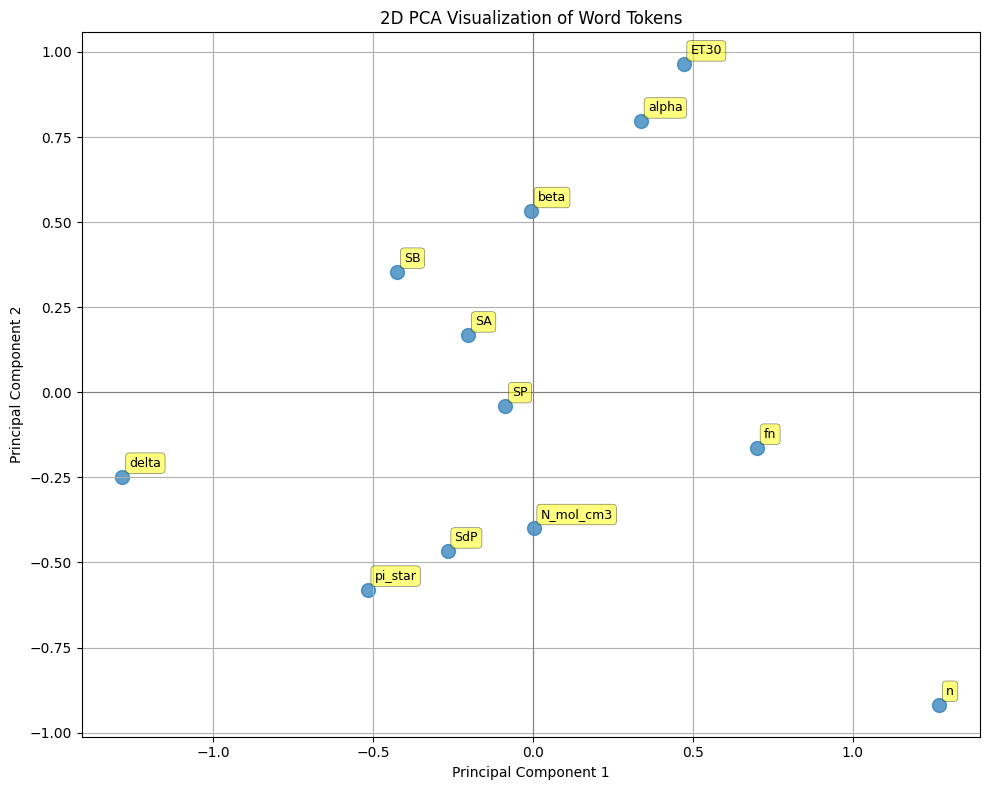

In [29]:
x_coords = df_12_cols.iloc[0].values

# The second row of df_12_cols contains the values for Principal Component 2
y_coords = df_12_cols.iloc[1].values

# The labels for each point are the column names
labels = df_12_cols.columns.tolist()

# --- Create the labeled scatter plot ---
plt.figure(figsize=(10, 8)) # Adjust figure size for better readability of labels

# Create the scatter plot
plt.scatter(x_coords, y_coords, s=100, alpha=0.7) # s is marker size

# Add labels to each point
for i, label in enumerate(labels):
    plt.annotate(
        label, # The text label
        (x_coords[i], y_coords[i]), # The (x, y) coordinates of the point
        textcoords="offset points", # How to position the text
        xytext=(5,5), # Offset from the point (x, y)
        ha='left', # Horizontal alignment
        va='bottom', # Vertical alignment
        fontsize=9, # Font size of the label
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5, ec="k", lw=0.5) # Optional: add a background box
    )

# Add plot titles and labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization of Word Tokens')
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8) # Add horizontal line at y=0
plt.axvline(0, color='grey', linewidth=0.8) # Add vertical line at x=0

# Adjust plot limits if labels are cut off
plt.tight_layout() # Adjust layout to prevent labels from overlapping with plot edges

plt.show()